# <b><span style='color:#F1A424'>AutoML - Binary Classification - Breast Cancer Prediction - Deploy Models </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset used - Breast Cancer Dataset**

**Features**:

- `ID number`
-  `Diagnosis` : (M = malignant, B = benign)

- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

- The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

- All feature values are recoded with four significant digits.

- Missing attribute values: none


**Target Variable**:

- `diagnosis`: 357 benign, 212 malignant

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of cancer i.e., benign and malignant.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.



In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','breast_cancer')

In [6]:
# Fetching in teradata dataframe
cancer_df = DataFrame("breast_cancer")

In [7]:
# first 5 rows
cancer_df.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
894329,B,9.042,18.9,60.07,244.5,0.09968,0.1972,0.1975,0.04908,0.233,0.08743,0.4653,1.911,3.769,24.2,0.009845,0.0659,0.1027,0.02527,0.03491,0.007877,10.06,23.4,68.62,297.1,0.1221,0.3748,0.4609,0.1145,0.3135,0.1055
879830,M,17.01,20.26,109.7,904.3,0.08772,0.07304,0.0695,0.0539,0.2026,0.05223,0.5858,0.8554,4.106,68.46,0.005038,0.01503,0.01946,0.01123,0.02294,0.002581,19.8,25.05,130.0,1210.0,0.1111,0.1486,0.1932,0.1096,0.3275,0.06469
87930,B,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.044,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875
901303,B,16.17,16.07,106.3,788.5,0.0988,0.1438,0.06651,0.05397,0.199,0.06572,0.1745,0.489,1.349,14.91,0.00451,0.01812,0.01951,0.01196,0.01934,0.003696,16.97,19.14,113.1,861.5,0.1235,0.255,0.2114,0.1251,0.3153,0.0896
902975,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,0.2666,0.8309,2.097,19.96,0.004405,0.03026,0.04344,0.01087,0.01921,0.004622,13.13,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.0914,0.2677,0.08824
86973701,B,14.95,18.77,97.84,689.5,0.08138,0.1167,0.0905,0.03562,0.1744,0.06493,0.422,1.909,3.271,39.43,0.00579,0.04877,0.05303,0.01527,0.03356,0.009368,16.25,25.47,107.1,809.7,0.0997,0.2521,0.25,0.08405,0.2852,0.09218
91544002,B,11.06,17.12,71.25,366.5,0.1194,0.1071,0.04063,0.04268,0.1954,0.07976,0.1779,1.03,1.318,12.3,0.01262,0.02348,0.018,0.01285,0.0222,0.008313,11.69,20.74,76.08,411.1,0.1662,0.2031,0.1256,0.09514,0.278,0.1168
855625,M,19.07,24.81,128.3,1104.0,0.09081,0.219,0.2107,0.09961,0.231,0.06343,0.9811,1.666,8.83,104.9,0.006548,0.1006,0.09723,0.02638,0.05333,0.007646,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.467,0.1038
877159,M,18.08,21.84,117.4,1024.0,0.07371,0.08642,0.1103,0.05778,0.177,0.0534,0.6362,1.305,4.312,76.36,0.00553,0.05296,0.0611,0.01444,0.0214,0.005036,19.76,24.7,129.1,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
914862,B,15.04,16.74,98.73,689.4,0.09883,0.1364,0.07721,0.06142,0.1668,0.06869,0.372,0.8423,2.304,34.84,0.004123,0.01819,0.01996,0.01004,0.01055,0.003237,16.76,20.43,109.7,856.9,0.1135,0.2176,0.1856,0.1018,0.2177,0.08549


In [8]:
# cancer_df dataset
cancer_df.shape

(569, 32)

In [9]:
# Performing sampling to get 80% for trainning and 20% for testing
cancer_df_sample = cancer_df.sample(frac = [0.8, 0.2])

In [10]:
cancer_df_sample.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,sampleid
865432,B,14.5,10.89,94.28,640.7,0.1101,0.1099,0.08842,0.05778,0.1856,0.06402,0.2929,0.857,1.928,24.19,0.003818,0.01276,0.02882,0.012,0.0191,0.002808,15.7,15.98,102.8,745.5,0.1313,0.1788,0.256,0.1221,0.2889,0.08006,1
911150,B,14.53,19.34,94.25,659.7,0.08388,0.078,0.08817,0.02925,0.1473,0.05746,0.2535,1.354,1.994,23.04,0.004147,0.02048,0.03379,0.008848,0.01394,0.002327,16.3,28.39,108.1,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463,1
904971,B,10.94,18.59,70.39,370.0,0.1004,0.0746,0.04944,0.02932,0.1486,0.06615,0.3796,1.743,3.018,25.78,0.009519,0.02134,0.0199,0.01155,0.02079,0.002701,12.4,25.58,82.76,472.4,0.1363,0.1644,0.1412,0.07887,0.2251,0.07732,1
857438,M,15.1,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.0103,0.01603,0.009222,0.01095,0.001629,18.1,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.153,0.2675,0.07873,1
902975,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,0.2666,0.8309,2.097,19.96,0.004405,0.03026,0.04344,0.01087,0.01921,0.004622,13.13,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.0914,0.2677,0.08824,1
855625,M,19.07,24.81,128.3,1104.0,0.09081,0.219,0.2107,0.09961,0.231,0.06343,0.9811,1.666,8.83,104.9,0.006548,0.1006,0.09723,0.02638,0.05333,0.007646,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.467,0.1038,1
895633,M,16.26,21.88,107.5,826.8,0.1165,0.1283,0.1799,0.07981,0.1869,0.06532,0.5706,1.457,2.961,57.72,0.01056,0.03756,0.05839,0.01186,0.04022,0.006187,17.73,25.21,113.7,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953,1
8910988,M,21.75,20.99,147.3,1491.0,0.09401,0.1961,0.2195,0.1088,0.1721,0.06194,1.167,1.352,8.867,156.8,0.005687,0.0496,0.06329,0.01561,0.01924,0.004614,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858,2
889719,M,17.19,22.07,111.6,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.0558,0.4203,0.7383,2.819,45.42,0.004493,0.01206,0.02048,0.009875,0.01144,0.001575,21.58,29.33,140.5,1436.0,0.1558,0.2567,0.3889,0.1984,0.3216,0.0757,1
879830,M,17.01,20.26,109.7,904.3,0.08772,0.07304,0.0695,0.0539,0.2026,0.05223,0.5858,0.8554,4.106,68.46,0.005038,0.01503,0.01946,0.01123,0.02294,0.002581,19.8,25.05,130.0,1210.0,0.1111,0.1486,0.1932,0.1096,0.3275,0.06469,1


In [11]:
# Fetching train and test data
cancer_df_train= cancer_df_sample[cancer_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
cancer_df_test = cancer_df_sample[cancer_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
# train data shape
cancer_df_train.shape

(455, 32)

In [13]:
# test data shape
cancer_df_test.shape

(114, 32)

In [14]:
#train dataset
cancer_df_train.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
894329,B,9.042,18.9,60.07,244.5,0.09968,0.1972,0.1975,0.04908,0.233,0.08743,0.4653,1.911,3.769,24.2,0.009845,0.0659,0.1027,0.02527,0.03491,0.007877,10.06,23.4,68.62,297.1,0.1221,0.3748,0.4609,0.1145,0.3135,0.1055
862965,B,12.18,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.0177,0.1739,0.05677,0.1924,1.571,1.183,14.68,0.00508,0.006098,0.01069,0.006797,0.01447,0.001532,13.34,32.84,84.58,547.8,0.1123,0.08862,0.1145,0.07431,0.2694,0.06878
852973,M,15.3,25.27,102.4,732.4,0.1082,0.1697,0.1683,0.08751,0.1926,0.0654,0.439,1.012,3.498,43.5,0.005233,0.03057,0.03576,0.01083,0.01768,0.002967,20.27,36.71,149.3,1269.0,0.1641,0.611,0.6335,0.2024,0.4027,0.09876
914862,B,15.04,16.74,98.73,689.4,0.09883,0.1364,0.07721,0.06142,0.1668,0.06869,0.372,0.8423,2.304,34.84,0.004123,0.01819,0.01996,0.01004,0.01055,0.003237,16.76,20.43,109.7,856.9,0.1135,0.2176,0.1856,0.1018,0.2177,0.08549
901303,B,16.17,16.07,106.3,788.5,0.0988,0.1438,0.06651,0.05397,0.199,0.06572,0.1745,0.489,1.349,14.91,0.00451,0.01812,0.01951,0.01196,0.01934,0.003696,16.97,19.14,113.1,861.5,0.1235,0.255,0.2114,0.1251,0.3153,0.0896
86973701,B,14.95,18.77,97.84,689.5,0.08138,0.1167,0.0905,0.03562,0.1744,0.06493,0.422,1.909,3.271,39.43,0.00579,0.04877,0.05303,0.01527,0.03356,0.009368,16.25,25.47,107.1,809.7,0.0997,0.2521,0.25,0.08405,0.2852,0.09218
85713702,B,8.196,16.84,51.71,201.9,0.086,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.01646,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409
87930,B,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.044,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875
877159,M,18.08,21.84,117.4,1024.0,0.07371,0.08642,0.1103,0.05778,0.177,0.0534,0.6362,1.305,4.312,76.36,0.00553,0.05296,0.0611,0.01444,0.0214,0.005036,19.76,24.7,129.1,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
879830,M,17.01,20.26,109.7,904.3,0.08772,0.07304,0.0695,0.0539,0.2026,0.05223,0.5858,0.8554,4.106,68.46,0.005038,0.01503,0.01946,0.01123,0.02294,0.002581,19.8,25.05,130.0,1210.0,0.1111,0.1486,0.1932,0.1096,0.3275,0.06469


In [15]:
# test dataset
cancer_df_test.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
84799002,M,14.54,27.54,96.73,658.8,0.1139,0.1595,0.1639,0.07364,0.2303,0.07077,0.37,1.033,2.879,32.55,0.005607,0.0424,0.04741,0.0109,0.01857,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.1341
868999,B,9.738,11.97,61.24,288.5,0.0925,0.04102,0.0,0.0,0.1903,0.06422,0.1988,0.496,1.218,12.26,0.00604,0.005656,0.0,0.0,0.02277,0.00322,10.62,14.1,66.53,342.9,0.1234,0.07204,0.0,0.0,0.3105,0.08151
869104,M,16.11,18.05,105.1,813.0,0.09721,0.1137,0.09447,0.05943,0.1861,0.06248,0.7049,1.332,4.533,74.08,0.00677,0.01938,0.03067,0.01167,0.01875,0.003434,19.92,25.27,129.0,1233.0,0.1314,0.2236,0.2802,0.1216,0.2792,0.08158
855133,M,14.99,25.2,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.214,2.188,8.077,106.0,0.006883,0.01094,0.01818,0.01917,0.007882,0.001754,14.99,25.2,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
905501,B,12.27,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.02653,0.1966,0.05597,0.3342,1.781,2.079,25.79,0.005888,0.0231,0.02059,0.01075,0.02578,0.002267,14.1,28.88,89.0,610.2,0.124,0.1795,0.1377,0.09532,0.3455,0.06896
8610637,M,18.05,16.15,120.2,1006.0,0.1065,0.2146,0.1684,0.108,0.2152,0.06673,0.9806,0.5505,6.311,134.8,0.00794,0.05839,0.04658,0.0207,0.02591,0.007054,22.39,18.91,150.1,1610.0,0.1478,0.5634,0.3786,0.2102,0.3751,0.1108
915186,B,9.268,12.87,61.49,248.7,0.1634,0.2239,0.0973,0.05252,0.2378,0.09502,0.4076,1.093,3.014,20.04,0.009783,0.04542,0.03483,0.02188,0.02542,0.01045,10.28,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.1025,0.3038,0.1252
91544002,B,11.06,17.12,71.25,366.5,0.1194,0.1071,0.04063,0.04268,0.1954,0.07976,0.1779,1.03,1.318,12.3,0.01262,0.02348,0.018,0.01285,0.0222,0.008313,11.69,20.74,76.08,411.1,0.1662,0.2031,0.1256,0.09514,0.278,0.1168
90602302,M,15.5,21.08,102.9,803.1,0.112,0.1571,0.1522,0.08481,0.2085,0.06864,1.37,1.213,9.424,176.5,0.008198,0.03889,0.04493,0.02139,0.02018,0.005815,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.1048
904357,B,11.8,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,0.3438,1.14,2.225,25.06,0.005463,0.01964,0.02079,0.005398,0.01477,0.003071,13.45,24.49,86.0,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML with user specified ID Column </b>

In [16]:
# Creating AutoML instance Using 'svm' and 'xgboost' models from model training.
# Keeping early stopping max_models to 5 and enable_lasso = True for feature selection.
# Verbose level 2 for detailed loggging.

aml = AutoClassifier(verbose=2,
                     include=['svm','xgboost'], 
                     max_models=5,
                     enable_lasso=True)

2026-01-21 08:43:24,083 | INFO     | Feature Exploration started
2026-01-21 08:43:24,085 | INFO     | Data Overview:
2026-01-21 08:43:24,357 | INFO     | Total Rows in the data: 455
2026-01-21 08:43:24,697 | INFO     | Total Columns in the data: 32
2026-01-21 08:43:32,463 | INFO     | Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
texture_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
concavity_mean,FLOAT,455,0,None,9,446,0,0.0,100.0
concavity_se,FLOAT,455,0,None,9,446,0,0.0,100.0
symmetry_se,FLOAT,455,0,None,0,455,0,0.0,100.0
area_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
smoothness_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
perimeter_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
compactness_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
radius_se,FLOAT,455,0,None,0,455,0,0.0,100.0
radius_worst,FLOAT,455,0,None,0,455,0,0.0,100.0


2026-01-21 08:43:37,800 | INFO     | Statistics of Data:


ATTRIBUTE,StatName,StatValue
compactness_mean,MAXIMUM,0.3454
area_worst,MINIMUM,185.2
area_worst,MAXIMUM,4254.0
area_mean,COUNT,455.0
area_mean,MAXIMUM,2501.0
area_se,COUNT,455.0
area_se,MINIMUM,6.802
area_se,MAXIMUM,542.2
area_mean,MINIMUM,143.5
area_worst,COUNT,455.0


2026-01-21 08:43:38,779 | INFO     | Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
diagnosis                 2         
2026-01-21 08:43:47,928 | INFO     | No Futile columns found.
2026-01-21 08:43:55,381 | INFO     | Target Column Distribution:


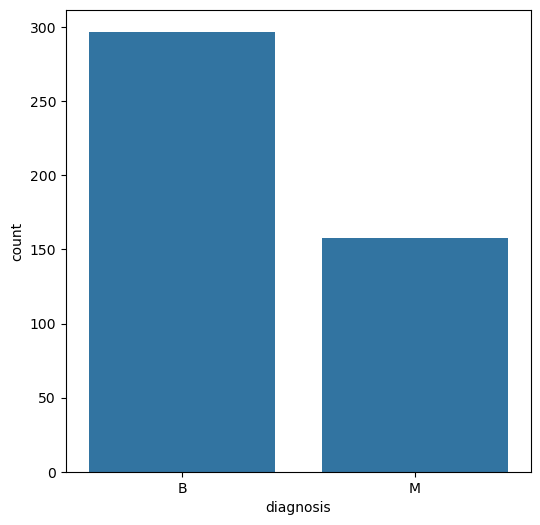

2026-01-21 08:44:12,799 | INFO     | Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                             
         ColumnName  OutlierPercentage
0         radius_se           7.472527
1    concavity_mean           3.736264
2        texture_se           3.296703
3                id          12.747253
4           area_se          10.769231
5       radius_mean           3.076923
6      texture_mean           1.538462
7    perimeter_mean           2.417582
8  compactness_mean           2.857143
9         area_mean           7.472527


2026-01-21 08:44:14,266 | INFO     | Feature Engineering started ...                    
2026-01-21 08:44:14,267 | INFO     | Handling duplicate records present in dataset ...  
2026-01-21 08:44:15,319 | INFO     | Analysis completed. No action taken.               
2026-01-21 08:44:15,321 | INFO     | Total time to handle duplicate records: 1.04 sec   
2026-01-21 08:44:15,329 | INFO     | Handling less significant features from data ...   
2026-01-21 08:44:27,790 | INFO     | Total time to handle less significant features: 12.46 sec  
2026-01-21 08:44:27,790 | INFO     | Handling Date Features ...                          
2026-01-21 08:44:27,804 | INFO     | Analysis Completed. Dataset does not contain any feature related to dates. No action needed.
2026-01-21 08:44:27,809 | INFO     | Total time to handle date features: 0.00 sec        
2026-01-21 08:44:27,816 | INFO     | Checking Missing values in dataset ...              
2026-01-21 08:44:31,671 | INFO     | Analysis Completed. N

2026-01-21 08:44:33,961 | INFO     | Data preparation started ...                        
2026-01-21 08:44:33,965 | INFO     | Outlier preprocessing ...                           
2026-01-21 08:44:48,985 | INFO     | Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                             
                ColumnName  OutlierPercentage
0          perimeter_worst           5.054945
1                area_mean           7.472527
2  fractal_dimension_worst           3.956044
3               area_worst           8.571429
4          smoothness_mean           0.659341
5        compactness_worst           3.7362

texture_mean,symmetry_mean,radius_worst,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,id,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,concave_points_se,radius_mean,diagnosis
18.68,0.1714,15.11,99.43,0.2566,0.107,571.0,0.3191,0.0187,701.9,917896,0.05385,0.09916,0.03783,0.02251,0.09031,0.003747,0.1935,25.63,0.02086,0.006739,0.1284,0.06843,26.45,2.284,1.249,0.2849,0.1425,88.73,0.01352,13.71,0
16.35,0.1885,11.25,71.12,0.08842,0.04994,324.9,0.2104,0.0156,384.9,922577,0.01012,0.09434,0.005495,0.007247,0.07399,0.002606,0.04384,21.77,0.01012,0.007086,0.02381,0.06201,12.97,1.356,0.967,0.2681,0.1285,65.31,0.005495,10.32,0
21.01,0.1717,10.41,67.03,0.1664,0.07773,269.4,0.2351,0.02279,330.7,859464,0.02172,0.1044,0.01504,0.01755,0.09211,0.004237,0.09412,31.56,0.01714,0.01052,0.06517,0.06899,14.2,1.66,2.011,0.2878,0.1548,60.11,0.009333,9.465,0
14.08,0.1673,12.85,81.6,0.05332,0.03212,461.4,0.2113,0.01977,513.1,894090,0.01123,0.07734,0.005051,0.005767,0.06037,0.0009502,0.04116,16.47,0.01123,0.005343,0.01852,0.05649,15.82,1.438,0.5996,0.2293,0.1001,77.25,0.005051,12.18,0
15.51,0.1881,16.41,114.2,0.3627,0.1096,684.5,0.2318,0.01391,808.2,88147102,0.06505,0.08371,0.0378,0.03207,0.08362,0.003204,0.3402,19.31,0.03644,0.004119,0.1379,0.05907,19.88,2.276,0.4966,0.2954,0.1136,97.45,0.01155,15.0,0
22.22,0.1551,13.58,87.36,0.2338,0.1015,464.5,0.2949,0.01879,553.0,8712064,0.0537,0.1012,0.02822,0.03175,0.09082,0.005348,0.1688,28.68,0.03125,0.01134,0.08194,0.06761,21.55,1.955,1.656,0.2268,0.1452,79.85,0.01135,12.34,0
15.51,0.1782,18.76,124.3,0.4478,0.1371,793.2,0.3371,0.01467,1070.0,896839,0.1204,0.09491,0.07041,0.03245,0.09124,0.003121,0.4956,21.98,0.03715,0.005839,0.1981,0.05976,33.27,2.629,0.7476,0.3019,0.1435,105.8,0.01459,16.03,1
16.18,0.1743,11.28,71.53,0.236,0.1111,324.2,0.3677,0.02719,390.4,894604,0.06726,0.1061,0.03965,0.04265,0.09702,0.007596,0.1898,20.61,0.04004,0.01049,0.09744,0.07279,22.68,1.597,1.471,0.2608,0.1402,66.52,0.01544,10.25,0
13.47,0.2075,16.77,110.4,0.1525,0.07624,641.2,0.522,0.02266,873.2,88143502,0.05724,0.09906,0.04603,0.01428,0.06072,0.001463,0.1632,16.9,0.0236,0.007089,0.1087,0.05448,48.29,3.763,0.8121,0.3062,0.1297,92.51,0.01286,14.34,0
17.05,0.1908,16.39,108.1,0.3262,0.1279,602.4,0.425,0.02062,826.0,886452,0.09789,0.1096,0.05246,0.02679,0.07957,0.002695,0.3209,22.07,0.03119,0.006351,0.1374,0.0613,35.74,2.563,0.8098,0.3068,0.1512,91.43,0.01342,13.96,1


2026-01-21 08:45:02,819 | INFO     | median inplace of outliers:                         
['area_worst', 'area_se']                                                                
2026-01-21 08:45:12,761 | INFO     | Sample of dataset after performing MEDIAN inplace:  


texture_mean,symmetry_mean,radius_worst,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,id,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,concave_points_se,radius_mean,diagnosis
22.41,0.1727,17.8,113.8,0.3299,0.1052,710.6,0.2054,0.01172,973.1,873885,0.05375,0.09057,0.03263,0.01395,0.09772,0.002575,0.363,28.03,0.01774,0.00329,0.1226,0.06317,19.53,1.344,0.4956,0.3175,0.1301,98.92,0.006009,15.28,1
28.21,0.1421,14.69,97.11,0.1457,0.04726,562.1,0.1689,0.01442,680.6,9013579,0.01271,0.07517,0.01117,0.01203,0.07061,0.001684,0.07934,35.63,0.007508,0.004942,0.05781,0.05763,14.91,1.4,1.15,0.2694,0.1108,85.89,0.005179,13.46,0
18.17,0.1641,14.38,95.29,0.3842,0.1334,485.6,0.2324,0.01759,633.7,914366,0.08017,0.1076,0.05074,0.02502,0.1033,0.003563,0.3582,22.15,0.02636,0.005704,0.1407,0.06854,18.4,1.696,0.6332,0.323,0.1533,82.69,0.01032,12.65,0
20.26,0.2026,19.8,130.0,0.1486,0.07304,904.3,0.5858,0.02294,1210.0,879830,0.0695,0.08772,0.0539,0.01503,0.06469,0.002581,0.1932,25.05,0.01946,0.005038,0.1096,0.05223,20.67,4.106,0.8554,0.3275,0.1111,109.7,0.01123,17.01,1
19.13,0.1848,15.14,101.4,0.3167,0.1147,575.3,0.2244,0.01581,708.8,906878,0.09657,0.09057,0.04812,0.02809,0.08839,0.003956,0.366,25.5,0.03669,0.00398,0.1407,0.06181,19.36,1.804,0.895,0.2744,0.1147,89.46,0.01274,13.66,0
14.86,0.1735,17.71,115.9,0.1722,0.08501,800.0,0.2387,0.015,947.9,905189,0.055,0.09495,0.04528,0.01246,0.07012,0.001621,0.231,19.58,0.01831,0.003958,0.1129,0.05875,21.83,1.729,0.6372,0.2778,0.1206,104.3,0.008747,16.14,0
20.26,0.1802,23.73,160.5,0.3309,0.131,1214.0,0.5079,0.01057,624.35,916838,0.1411,0.1037,0.09431,0.02303,0.09136,0.003391,0.4185,25.23,0.03052,0.005089,0.1613,0.06188,20.67,3.654,0.8737,0.2549,0.1417,130.5,0.01178,19.89,1
17.93,0.1382,13.07,82.74,0.0739,0.03892,446.0,0.2335,0.01466,523.4,895299,0.001546,0.07683,0.005592,0.006887,0.07037,0.001755,0.007732,22.25,0.001184,0.004729,0.02796,0.0607,16.97,1.466,0.9097,0.2171,0.1013,76.09,0.003951,12.03,0
15.69,0.1632,16.46,103.7,0.07087,0.03515,664.9,0.316,0.01494,840.8,89382601,0.01447,0.07618,0.01877,0.006021,0.05695,0.0008948,0.04746,21.75,0.005325,0.005031,0.05813,0.05255,28.9,1.954,0.9115,0.253,0.1011,92.68,0.006324,14.61,0
19.02,0.1539,13.35,84.53,0.09052,0.04202,464.4,0.184,0.01939,544.3,897374,0.007756,0.08313,0.008535,0.008432,0.07207,0.002222,0.03619,28.46,0.007004,0.007881,0.03983,0.05945,13.24,1.199,1.532,0.2554,0.1222,77.88,0.006522,12.3,0


2026-01-21 08:45:14,294 | INFO     | Time Taken by Outlier processing: 40.32 sec         
2026-01-21 08:45:14,300 | INFO     | Checking imbalance data ...                         
2026-01-21 08:45:14,659 | INFO     | Imbalance Found.                                    
2026-01-21 08:45:14,665 | INFO     | Handling data imbalance using SMOTE ...             
2026-01-21 08:45:27,783 | INFO     | Completed data imbalance handling.                  
2026-01-21 08:45:32,784 | INFO     | Feature selection using lasso ...                   
2026-01-21 08:45:43,820 | INFO     | feature selected by lasso:                          
['radius_worst', 'texture_mean', 'symmetry_mean', 'perimeter_worst', 'compactness_worst', 'compactness_mean', 'area_mean', 'radius_se', 'symmetry_se', 'area_worst', 'concavity_mean', 'smoothness_mean', 'concave_points_mean', 'compactness_se', 'concave_points_se', 'fractal_dimension_se', 'concavity_worst', 'texture_worst', 'concavity_se', 'smoothness_se', 'concave_poin

diagnosis,id,radius_worst,texture_mean,symmetry_mean,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,concave_points_se,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,fractal_dimension_worst,radius_mean
1,6,0.4997046662728884,0.3383217530732229,0.7057142857142856,0.4973704629709457,0.554310672236992,0.6075027995520718,0.4286781877627277,0.4605575326215896,0.4475806451612904,0.5831816527120495,0.43395390070921985,0.745253164556962,0.41047693510555117,0.48323471400394485,0.6504854368932039,0.2647058823529412,0.4368958475153165,0.33249006143838095,0.4250681198910081,0.3636363636363637,0.5403067243413291,0.39208633093525175,0.6728515625,0.38001102956772587,0.22894388430593746,0.5814479638009051,0.6563380281690141,0.5494175988928613,0.37366003062787145,0.5406305678209002
0,8,0.5215593620791495,0.6087653661143773,0.7399999999999999,0.5154754720234503,0.5700721610330423,0.46528555431131013,0.5139654367118169,0.30278766310794786,0.38709677419354843,0.6205860939206408,0.30407801418439717,0.35917721518987333,0.3033620015637216,0.5088757396449705,0.5825242718446602,0.45588235294117646,0.42396187882913544,0.6750993856161908,0.4509536784741144,0.16161616161616166,0.5143531262288635,0.3129496402877697,0.5047433035714286,0.3263479404403343,0.49689377737040435,0.6244343891402717,0.24788732394366203,0.6197670395571445,0.5712098009188362,0.620419862111705
0,9,0.33254577672770236,0.3741314804917156,0.7333333333333334,0.3269247348909389,0.27155336118496015,0.4378499440089586,0.2827650630546473,0.25163107947805463,0.43145161290322587,0.3406443392792137,0.2118794326241135,0.639240506329114,0.26035965598123534,0.27613412228796846,0.3640776699029126,0.13235294117647056,0.2182437031994554,0.46729309721720275,0.2506811989100817,0.5353535353535354,0.24655918206842312,0.4028776978417266,0.35849144345238093,0.23280872184278623,0.6578062939199512,0.5728506787330317,0.5812206572769952,0.39534079114289,0.2388973966309342,0.39654504609187385
0,10,0.5221500295333728,0.14698022447888828,0.8647619047619046,0.5171997585998793,0.22445879225218385,0.3180291153415454,0.464922933208781,0.6043890865954924,0.5322580645161292,0.6261376046596288,0.25354609929078015,0.5791139240506328,0.35965598123534004,0.2366863905325444,0.6262135922330097,0.08823529411764706,0.2221919673247107,0.14564510299963856,0.3215258855585831,0.43434343434343436,0.4274478961856075,0.14748201438848915,0.964657738095238,0.6345395155474484,0.23011508300234243,0.5787330316742083,0.45446009389671377,0.5618729096989967,0.08422664624808573,0.5700673948408087
0,12,0.3047844063792085,0.9358631747728486,0.4266666666666667,0.2988188636951461,0.28731484998101026,0.25251959686450165,0.2793087342363382,0.1138790035587189,0.3225806451612905,0.3080633418274482,0.1799645390070922,0.34651898734177217,0.1516810007818608,0.465483234714004,0.4466019417475728,0.5,0.24656228727025187,0.9038670039754247,0.40054495912806537,0.45454545454545464,0.27998427054659847,0.38129496402877683,0.16410900297619047,0.15793492555041785,0.684794785619717,0.30045248868778285,0.3708920187793428,0.38034828739476406,0.4088820826952527,0.38879851266558213
1,13,0.8033077377436504,0.925173703901657,0.52,0.8189499094749547,0.649259399924041,0.6270996640537513,0.7829051844932274,0.40821470937129306,0.11693548387096775,0.39966326902074994,0.7526595744680852,0.5933544303797469,0.6481626270523846,0.3530571992110454,0.5388349514563107,0.24999999999999997,0.8712049012933969,0.9277195518612216,0.5040871934604904,0.19191919191919196,0.7746755800235942,0.3165467625899281,0.8637462797619048,0.4457642217791542,0.3650066198187188,0.5380090497737559,0.5521126760563381,0.8477684234805672,0.5436447166921899,0.8342241846773568
0,11,0.5038393384524513,0.26563335114911807,0.44285714285714295,0.4594361

2026-01-21 08:46:26,279 | INFO     | Total time taken by feature scaling: 39.84 sec      
2026-01-21 08:46:26,287 | INFO     | Feature selection using rfe ...                      
2026-01-21 08:49:56,685 | INFO     | feature selected by RFE:                             
['texture_mean', 'radius_worst', 'perimeter_worst', 'area_mean', 'radius_se', 'area_worst', 'concavity_mean', 'concave_points_mean', 'concavity_worst', 'texture_worst', 'concave_points_worst', 'area_se', 'perimeter_se', 'smoothness_worst', 'perimeter_mean', 'radius_mean']
2026-01-21 08:49:56,732 | INFO     | Total time taken by feature selection: 210.03 sec    
2026-01-21 08:49:58,989 | INFO     | Scaling Features of rfe data ...                     
2026-01-21 08:50:15,725 | INFO     | columns that will be scaled:                         
['r_texture_mean', 'r_radius_worst', 'r_perimeter_worst', 'r_area_mean', 'r_radius_se', 'r_area_worst', 'r_concavity_mean', 'r_concave_points_mean', 'r_concavity_worst', 'r_texture_w

diagnosis,id,r_texture_mean,r_radius_worst,r_perimeter_worst,r_area_mean,r_radius_se,r_area_worst,r_concavity_mean,r_concave_points_mean,r_concavity_worst,r_texture_worst,r_concave_points_worst,r_area_se,r_perimeter_se,r_smoothness_worst,r_perimeter_mean,r_radius_mean
1,6,0.3383217530732229,0.4997046662728884,0.4973704629709457,0.4286781877627277,0.4605575326215896,0.5831816527120495,0.43395390070921985,0.41047693510555117,0.4368958475153165,0.33249006143838095,0.5403067243413291,0.6728515625,0.38001102956772587,0.6563380281690141,0.5494175988928613,0.5406305678209002
0,8,0.6087653661143773,0.5215593620791495,0.5154754720234503,0.5139654367118169,0.30278766310794786,0.6205860939206408,0.30407801418439717,0.3033620015637216,0.42396187882913544,0.6750993856161908,0.5143531262288635,0.5047433035714286,0.3263479404403343,0.24788732394366203,0.6197670395571445,0.620419862111705
0,9,0.3741314804917156,0.33254577672770236,0.3269247348909389,0.2827650630546473,0.25163107947805463,0.3406443392792137,0.2118794326241135,0.26035965598123534,0.2182437031994554,0.46729309721720275,0.24655918206842312,0.35849144345238093,0.23280872184278623,0.5812206572769952,0.39534079114289,0.39654504609187385
0,10,0.14698022447888828,0.5221500295333728,0.5171997585998793,0.464922933208781,0.6043890865954924,0.6261376046596288,0.25354609929078015,0.35965598123534004,0.2221919673247107,0.14564510299963856,0.4274478961856075,0.964657738095238,0.6345395155474484,0.45446009389671377,0.5618729096989967,0.5700673948408087
0,12,0.9358631747728486,0.3047844063792085,0.2988188636951461,0.2793087342363382,0.1138790035587189,0.3080633418274482,0.1799645390070922,0.1516810007818608,0.24656228727025187,0.9038670039754247,0.27998427054659847,0.16410900297619047,0.15793492555041785,0.3708920187793428,0.38034828739476406,0.38879851266558213
1,13,0.925173703901657,0.8033077377436504,0.8189499094749547,0.7829051844932274,0.40821470937129306,0.39966326902074994,0.7526595744680852,0.6481626270523846,0.8712049012933969,0.9277195518612216,0.7746755800235942,0.8637462797619048,0.4457642217791542,0.5521126760563381,0.8477684234805672,0.8342241846773568
0,11,0.26563335114911807,0.5038393384524513,0.45943615828950773,0.48706212050443715,0.29893238434163705,0.5966508918820531,0.06427304964539007,0.14698983580922595,0.06466984343090537,0.3209251897361764,0.22847031065670464,0.5138113839285714,0.25083782293301654,0.18591549295774645,0.563833467881444,0.5909830350917964
0,7,0.44361304115446276,0.3201417601890136,0.2941632899387878,0.29976646426903314,0.10320284697508898,0.32681106661812886,0.034574468085106384,0.06645817044566067,0.04928522804628999,0.5634260932417782,0.15650806134486825,0.14969308035714285,0.09069698383744117,0.3840375586854461,0.39314957905662545,0.4120381129444574
0,5,0.10796365579903792,0.3077377436503249,0.2902836451418226,0.285007006071929,0.1005338078291815,0.31634510374954494,0.08732269503546099,0.15324472243940576,0.11763104152484684,0.20021684134441636,0.27644514353126226,0.14992559523809523,0.08475798583124763,0.4338028169014085,0.3811555760581248,0.3934464327213572
0,4,0.3842864778193479,0.4376845835794448,0.4033106302267437,0.41242410088743575,0.201067615658363,0.49208227156898443,0.1276595744680851,0.10398749022673963,0.21293396868618109,0.34658474882544277,0.23672827369248914,0.34105282738095233,0.17002502863445468,0.14835680751173716,0.5112443778110944,0.5235881942830584


2026-01-21 08:50:28,613 | INFO     | Total time taken by feature scaling: 29.61 sec       
2026-01-21 08:50:28,625 | INFO     | Scaling Features of pca data ...                     
2026-01-21 08:50:53,892 | INFO     | columns that will be scaled:                         
['texture_mean', 'symmetry_mean', 'radius_worst', 'perimeter_worst', 'compactness_worst', 'compactness_mean', 'area_mean', 'radius_se', 'symmetry_se', 'area_worst', 'concavity_mean', 'smoothness_mean', 'concave_points_mean', 'compactness_se', 'fractal_dimension_worst', 'fractal_dimension_se', 'concavity_worst', 'texture_worst', 'concavity_se', 'smoothness_se', 'concave_points_worst', 'fractal_dimension_mean', 'area_se', 'perimeter_se', 'texture_se', 'symmetry_worst', 'smoothness_worst', 'perimeter_mean', 'concave_points_se', 'radius_mean']
2026-01-21 08:51:07,427 | INFO     | Dataset sample after scaling:                        


diagnosis,id,texture_mean,symmetry_mean,radius_worst,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,concave_points_se,radius_mean
1,396,0.6774764037280397,0.4706713066941925,0.6798524111630347,0.6672504645793876,0.46988650131307413,0.3933748310673141,0.7870550073745683,0.5223530955137056,0.4529153772963654,0.8923534688427583,0.46606968810754174,0.2964309021452665,0.4457590827257448,0.7282613853717925,0.33853246005201243,0.501292965891241,0.44063287814502167,0.5281846526830803,0.7134354557009042,0.27896576756475094,0.5323409940685869,0.15739460987768814,0.8434332597153548,0.7098891382407669,0.4592569948981035,0.23669999918902548,0.2805341631686293,0.7562236145653539,0.7312661192062663,0.8226020115526729
1,310,0.5717586160745453,0.3996844401636292,0.6761026583622693,0.5801350371016047,0.4313033446048261,0.561389487389821,0.626535427879798,0.44588174918424267,0.2365683298372603,0.7727039560028831,0.45161831315305684,0.45160747435893667,0.3616335958523487,0.4441488411292703,0.30755899784881674,0.25609063923435954,0.4753151116953875,0.7898208700310789,0.3686820288391289,0.3184874671151381,0.6008733187913285,0.2835013318908277,0.8101627704188775,0.4593804003090044,0.40824186247605593,0.4140277532141074,0.445163824212231,0.7122275182629481,0.5615836579866813,0.631721647311096
1,314,0.4971352026203994,0.670362465019737,0.6383296157529371,0.6870761092740817,0.5462624984908768,0.6941808574526289,0.5696507343605235,0.38074911601287964,0.2564617247525414,0.5219944365881612,0.47588751154692915,0.6161564030437072,0.5010143081642296,0.3745024757221143,0.6346571129180582,0.23096569989220495,0.5082698963532747,0.52156436498461,0.3115824509927203,0.22607868463553407,0.6743963714718314,0.37730513182408293,0.65188496038157,0.36089921494922894,0.16472717375326756,0.47264478228411033,0.6200170821494084,0.6709378359429242,0.4687493809852279,0.8170350601531443
0,7,0.44361304115446276,0.35428571428571437,0.3201417601890136,0.2941632899387878,0.1067264233354856,0.1267495241294368,0.29976646426903314,0.10320284697508898,0.3973619458674519,0.32681106661812886,0.03437943262411348,0.32631745529355904,0.06673182173573103,0.12187426047172042,0.25823250114872104,0.19414294491091547,0.0492716133424098,0.5634260932417782,0.09543534541490667,0.514032946918853,0.15662603224537944,0.3248017303532806,0.14969308035714285,0.09069698383744117,0.5967002749770853,0.34886877828054313,0.3843266072266542,0.39314957905662545,0.31690962099125364,0.4120381129444574
1,251,0.515857648027773,0.6219520347498888,0.8074512660167276,0.7662452429178347,0.5394356993519753,0.6022588825680238,0.7606729589992746,0.30587836790679107,0.288873902141493,0.6565774989458021,0.7337049559941053,0.6567179683950649,0.7384817438317532,0.6061528904362667,0.5768143472995345,0.4705406176784738,0.6496872338972266,0.5390529882923989,0.4379911424629827,0.3717235718113043,0.647304945750249,0.3441990409877349,0.39938123417613536,0.38415842223308017,0.3410999107375228,0.5815286063268883,0.5914414064717883,0.828825161173461,0.7715330671250233,0.7767870290858447
0,5,0.10796365579903792,0.40285714285714286,0.3077377436503249,0.2902836451418226,0.1687872687910669,0.18491770238495128,0.285007006071929,0.1005338078291815,0.20616352708644262,0.31634510374954494,0.08741134751773051,0.48425383763253677,0.15347928068803754,0.14863532381478267,0.3640680042885587,0.2391972148269507,0.11757658270932607,0.20021684134441636,0.11366671208611528,0.27476103315029493,0.2762485253637436,0.3111031002162941,0.14992559523809523,0.08475798583124763,0.18754455647214588,0.33076923076923087,0.43406851243547634,0.3811555760581248,0.30481049562682216,0.3934464327213572
0,9,0.3741314804917156,0.7333333333

2026-01-21 08:51:11,291 | INFO     | Total time taken by feature scaling: 42.66 sec       
2026-01-21 08:51:11,305 | INFO     | Dimension Reduction using pca ...                    
2026-01-21 08:51:16,783 | INFO     | PCA columns:                                         
['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13']
2026-01-21 08:51:16,798 | INFO     | Total time taken by PCA: 5.48 sec                    


2026-01-21 08:51:21,448 | INFO     | Model Training started ...                           
2026-01-21 08:51:22,196 | INFO     | Hyperparameters used for model training:             
2026-01-21 08:51:22,205 | INFO     | Model: svm                                                                                                       
2026-01-21 08:51:22,211 | INFO     | Hyperparameters: {'response_column': 'diagnosis', 'name': 'svm', 'model_type': 'Classification', 'lambda1': (0.001, 0.02, 0.1), 'alpha': (0.15, 0.85), 'tolerance': (0.001, 0.01), 'learning_rate': 'OPTIMAL', 'initial_eta': (0.05, 0.1), 'momentum': (0.65, 0.8, 0.95), 'nesterov': True, 'intercept': True, 'iter_num_no_change': (5, 10, 50), 'local_sgd_iterations ': (10, 20), 'iter_max': (300, 200, 400, 500), 'batch_size': (10, 80, 100, 150)}
2026-01-21 08:51:22,214 | INFO     | Total number of models for svm: 6912
-------------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,SVM_1,rfe,0.978723,0.978723,0.978723,0.978723,0.978685,0.978685,0.978685,0.978723,0.978723,0.978723
1,2,SVM_2,pca,0.978723,0.978723,0.978723,0.978723,0.980392,0.977778,0.978636,0.979558,0.978723,0.978694
2,3,SVM_0,lasso,0.872340,0.872340,0.872340,0.872340,0.901639,0.866667,0.868531,0.897454,0.872340,0.869484
3,4,XGBOOST_1,rfe,0.478723,0.478723,0.478723,0.478723,0.239362,0.500000,0.323741,0.229176,0.478723,0.309965
4,5,XGBOOST_2,pca,0.478723,0.478723,0.478723,0.478723,0.239362,0.500000,0.323741,0.229176,0.478723,0.309965


In [17]:
aml.fit(data=cancer_df_train, 
        target_column=cancer_df_train.diagnosis, 
        id_column='id')

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,SVM_1,rfe,0.978723,0.978723,0.978723,0.978723,0.978685,0.978685,0.978685,0.978723,0.978723,0.978723
1,2,SVM_2,pca,0.978723,0.978723,0.978723,0.978723,0.980392,0.977778,0.978636,0.979558,0.978723,0.978694
2,3,SVM_0,lasso,0.872340,0.872340,0.872340,0.872340,0.901639,0.866667,0.868531,0.897454,0.872340,0.869484
3,4,XGBOOST_1,rfe,0.478723,0.478723,0.478723,0.478723,0.239362,0.500000,0.323741,0.229176,0.478723,0.309965
4,5,XGBOOST_2,pca,0.478723,0.478723,0.478723,0.478723,0.239362,0.500000,0.323741,0.229176,0.478723,0.309965


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,SVM_1,rfe,0.978723,0.978723,0.978723,0.978723,0.978685,0.978685,0.978685,0.978723,0.978723,0.978723


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
aml.model_hyperparameters(rank=1)

{'response_column': 'diagnosis',
 'model_type': 'Classification',
 'lambda1': 0.1,
 'alpha': 0.85,
 'tolerance': 0.001,
 'learning_rate': 'OPTIMAL',
 'initial_eta': 0.05,
 'momentum': 0.95,
 'nesterov': True,
 'intercept': True,
 'iter_num_no_change': 10,
 'local_sgd_iterations ': 20,
 'iter_max': 200,
 'batch_size': 100,
 'output_prob': True,
 'output_responses': ['1', '0']}

In [21]:
aml.model_hyperparameters(rank=3)

{'response_column': 'diagnosis',
 'model_type': 'Classification',
 'lambda1': 0.001,
 'alpha': 0.15,
 'tolerance': 0.01,
 'learning_rate': 'OPTIMAL',
 'initial_eta': 0.1,
 'momentum': 0.65,
 'nesterov': True,
 'intercept': True,
 'iter_num_no_change': 5,
 'local_sgd_iterations ': 20,
 'iter_max': 200,
 'batch_size': 100,
 'output_prob': True,
 'output_responses': ['1', '0']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction: </b>

In [22]:
# Generating prediction on test data
prediction = aml.predict(cancer_df_test, 2)

2026-01-21 09:03:08,444 | INFO     | Data Transformation started ...
2026-01-21 09:03:08,450 | INFO     | Performing transformation carried out in feature engineering phase ...
2026-01-21 09:03:12,350 | INFO     | Updated dataset after performing target column transformation :


texture_mean,symmetry_mean,radius_worst,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,id,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,concave_points_se,radius_mean,diagnosis
25.56,0.1308,18.07,120.4,0.1793,0.1146,948.0,0.5296,0.02175,1021.0,881094802,0.1682,0.1006,0.06597,0.08555,0.06818,0.01256,0.2803,28.07,0.1438,0.03113,0.1099,0.05866,58.53,3.767,1.667,0.1603,0.1243,114.5,0.03927,17.42,1
16.67,0.1339,13.33,86.16,0.1028,0.06095,423.6,0.4489,0.01359,546.7,868223,0.03592,0.1051,0.026,0.0138,0.07343,0.003707,0.1046,25.48,0.02662,0.006578,0.06968,0.05945,34.37,3.258,2.508,0.1712,0.1271,74.72,0.01307,11.71,0
16.95,0.178,16.11,104.6,0.1637,0.07885,685.9,0.2713,0.0135,793.7,8712853,0.02602,0.09855,0.03781,0.0137,0.06428,0.001706,0.06648,23.0,0.007276,0.00508,0.08485,0.0565,24.28,1.893,1.217,0.2404,0.1216,96.22,0.009073,14.97,0
18.22,0.1709,15.05,99.31,0.2961,0.1661,493.1,0.4426,0.01816,674.7,917062,0.04825,0.1218,0.05303,0.02329,0.08893,0.003299,0.1246,24.37,0.01405,0.005273,0.1096,0.07253,34.37,3.176,1.169,0.2582,0.1456,84.45,0.01244,12.88,0
23.09,0.1695,10.93,70.1,0.08614,0.06797,334.2,0.2868,0.03464,362.7,892399,0.02495,0.1015,0.01875,0.01443,0.06777,0.001971,0.04158,24.22,0.01861,0.01017,0.03125,0.06556,20.56,2.289,1.143,0.2227,0.1143,66.85,0.0125,10.51,0
15.65,0.2079,13.67,87.78,0.2003,0.07165,443.3,0.2271,0.01972,567.9,8612080,0.04151,0.09723,0.01863,0.01812,0.07924,0.002607,0.2267,24.9,0.02007,0.005969,0.07632,0.05968,16.16,1.441,1.255,0.3379,0.1377,76.95,0.007027,12.0,0
23.95,0.1807,17.11,117.7,0.4967,0.187,731.3,0.3331,0.02105,909.4,915460,0.203,0.1183,0.0852,0.0494,0.1067,0.006,0.5911,36.33,0.06019,0.009538,0.2163,0.07083,32.52,2.937,1.961,0.3013,0.1732,103.8,0.02041,15.46,1
14.76,0.1386,16.36,104.5,0.1238,0.05055,551.7,0.4057,0.01069,830.6,861853,0.03261,0.07355,0.02648,0.01038,0.06206,0.001435,0.135,22.35,0.01358,0.004481,0.1001,0.05318,36.35,2.701,1.153,0.2027,0.1006,84.74,0.01082,13.27,0
22.44,0.1544,14.17,92.74,0.1804,0.052,466.5,0.2239,0.01608,622.9,91376701,0.01714,0.08192,0.01261,0.01205,0.08203,0.002399,0.123,31.99,0.00941,0.005096,0.06335,0.05976,18.04,1.577,1.139,0.31,0.1256,78.18,0.004551,12.25,0
15.34,0.1822,14.77,97.67,0.2256,0.08498,538.9,0.271,0.02769,677.3,8711002,0.09293,0.09384,0.03483,0.02017,0.08633,0.003479,0.3009,20.5,0.03047,0.008584,0.09722,0.06207,22.79,1.819,0.7927,0.3849,0.1478,85.31,0.009536,13.15,0


2026-01-21 09:03:15,264 | INFO     | Performing transformation carried out in data preparation phase ...
2026-01-21 09:03:18,978 | INFO     | Updated dataset after performing Lasso feature selection:   


id,radius_worst,texture_mean,symmetry_mean,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,concave_points_se,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,fractal_dimension_worst,radius_mean,diagnosis
88206102,24.47,27.81,0.1448,162.7,0.2761,0.1074,1319.0,0.524,0.013,1872.0,0.1554,0.0916,0.0834,0.0206,0.0109,0.0029,0.4146,37.38,0.0346,0.005,0.1563,0.0559,70.01,3.767,1.189,0.2437,0.1223,134.4,0.0833,20.51,1
895100,25.3,21.51,0.2569,171.1,0.4492,0.1875,1264.0,0.5702,0.0277,1938.0,0.2565,0.117,0.1504,0.0243,0.0137,0.0033,0.5344,31.86,0.0319,0.0055,0.2685,0.0667,69.06,4.012,1.023,0.5558,0.1592,135.9,0.1024,20.34,1
885429,25.28,19.82,0.1733,159.8,0.5955,0.1849,1206.0,0.7661,0.0147,1933.0,0.2417,0.1062,0.0974,0.0506,0.0197,0.0073,0.8489,25.59,0.068,0.0085,0.2507,0.067,92.81,4.115,0.78,0.2749,0.171,130.7,0.1297,19.73,1
88330202,22.51,39.28,0.1809,141.2,0.3735,0.1298,920.6,0.5366,0.0123,1408.0,0.1417,0.0981,0.0881,0.0278,0.0137,0.0028,0.3241,44.87,0.026,0.0049,0.2066,0.0597,49.0,3.002,0.8561,0.2853,0.1365,113.4,0.085,17.46,1
8911670,19.96,19.98,0.155,129.0,0.116,0.0588,1102.0,0.3283,0.0193,1236.0,0.0802,0.0892,0.0584,0.0111,0.0146,0.0017,0.221,24.3,0.0262,0.0076,0.1294,0.05,36.74,2.363,0.828,0.2567,0.1243,120.9,0.0574,18.81,1
8911163,20.92,24.48,0.1538,135.1,0.1806,0.0703,998.9,0.4212,0.0142,1320.0,0.057,0.0886,0.0474,0.0117,0.0085,0.0028,0.208,34.69,0.0162,0.0054,0.1136,0.0551,45.81,2.765,1.433,0.2504,0.1315,115.2,0.0795,17.93,1
88649001,25.05,28.77,0.1893,178.6,0.5329,0.2063,1207.0,0.8426,0.0194,1926.0,0.1784,0.0926,0.1144,0.0476,0.0152,0.0053,0.4251,36.27,0.0386,0.0064,0.1941,0.0623,106.4,7.158,1.199,0.2818,0.1281,133.6,0.1005,19.55,1
903516,26.23,22.28,0.2162,172.0,0.5717,0.2087,1407.0,0.6242,0.0204,2081.0,0.281,0.1167,0.1562,0.0373,0.0129,0.004,0.7053,28.74,0.0472,0.0052,0.2422,0.0661,80.99,4.158,0.9209,0.3828,0.1502,144.4,0.1007,21.61,1
846226,20.96,24.8,0.2397,151.7,0.3903,0.2458,1123.0,0.9555,0.0448,1332.0,0.2065,0.0974,0.1118,0.083,0.0409,0.0128,0.3639,29.94,0.0889,0.0031,0.1767,0.078,116.2,11.07,3.568,0.3176,0.1037,132.4,0.1023,19.17,1
91504,16.01,24.49,0.2275,106.0,0.3966,0.1681,595.9,0.4751,0.0243,788.0,0.1357,0.1162,0.0676,0.0386,0.0162,0.007,0.3381,32.94,0.0348,0.0097,0.1521,0.0724,39.05,2.974,1.528,0.3651,0.1794,92.33,0.1183,13.82,1


2026-01-21 09:03:24,095 | INFO     | Updated dataset after performing scaling on Lasso selected features :


diagnosis,id,radius_worst,texture_mean,symmetry_mean,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,concave_points_se,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,fractal_dimension_worst,radius_mean
0,8610629,0.3632604843473125,0.011758417958311002,1.1771428571428573,0.3530476765238383,0.19673376376756552,0.4776035834266517,0.38832321345165816,0.43846381969157777,0.653225806451613,0.38250819075354936,0.3049645390070922,1.0537974683544302,0.5129007036747458,0.5147928994082841,0.3980582524271845,0.7794117647058822,0.11626957113682777,-0.01373328514636787,0.15803814713896455,1.0707070707070707,0.29138812426268185,0.5755395683453236,0.6010044642857142,0.39888855894455527,0.33292595987371426,0.41945701357466075,0.5990610328638498,0.5088225118210125,0.2557427258805514,0.5073204740878456
0,907409,0.24808033077377442,0.22768572955638694,0.7219047619047619,0.26726441934649536,0.503797949107482,0.4585666293393057,0.1775805698271836,0.3161328588374852,0.48790322580645173,0.2322533673097925,0.28102836879432624,0.5648734177215189,0.1735731039874902,0.7179487179487181,0.6116504854368932,0.5735294117647058,0.40013614703880185,0.31441994940368634,0.7166212534059945,0.4646464646464647,0.3661030279197798,0.6762589928057552,0.3247767857142857,0.3802231366393756,0.3904674610449129,0.5597285067873303,0.48262910798122083,0.2733248760235266,0.6324655436447167,0.27105120458594784
0,8610908,0.3727111636148849,0.38909673971138425,0.5247619047619048,0.3575308216225536,0.34143562476262823,0.4260918253079507,0.33890705277907524,0.22405100830367738,0.3225806451612905,0.39761558063341834,0.1724290780141844,0.5822784810126581,0.18139171227521497,0.2820512820512821,0.3980582524271845,0.27941176470588236,0.23567052416609938,0.4318756776292013,0.2820163487738419,0.25252525252525254,0.3118364136846244,0.3453237410071941,0.31501116071428575,0.2135069783226573,0.37417252266014867,0.45067873303167416,0.44694835680751166,0.45438819052012447,0.3675344563552834,0.455418700131691
0,8910251,0.23331364441819263,0.4398717263495456,0.719047619047619,0.24027933442538152,0.4124572730725409,0.5335946248600223,0.18953759925268565,0.49836892052194554,1.0282258064516132,0.21805606115762652,0.28324468085106386,0.5443037974683543,0.2064112587959343,0.6607495069033532,0.6650485436893204,0.35294117647058826,0.260857726344452,0.3639320563787496,0.45640326975476836,0.4747474747474747,0.3118364136846244,0.5215827338129495,0.47195870535714285,0.5639078606880754,0.4261126387615847,0.5235294117647059,0.375586854460094,0.293968400415177,0.3169984686064318,0.2803470446974978
0,89511502,0.34140578854105147,0.3516835916622127,0.5142857142857141,0.33011466505733256,0.16502088872009119,0.3202687569988802,0.3235871088276506,0.14175563463819693,0.4475806451612904,0.35420458682198763,0.14140070921985815,0.6376582278481012,0.16497263487099295,0.14201183431952663,0.31553398058252424,0.13235294117647056,0.13886997957794417,0.29743404409107344,0.18119891008174385,0.4040404040404041,0.22021234762092015,0.3381294964028776,0.2513020833333333,0.1685402791329063,0.30059069151644774,0.4095022624434389,0.536150234741784,0.4320147618498443,0.20980091883614096,0.44070028662173677
0,901549,0.2900177200236267,0.11972207375734902,0.8104761904761905,0.2976118630916459,0.39612609191036846,0.513437849944009,0.226809901914993,0.21026097271648875,0.4677419354838711,0.2647433563887878,0.350177304964539,0.9683544303797468,0.43393275996872555,0.3057199211045365,0.5631067961165048,0.411764705882353,0.3059223961878829,0.27683411637152155,0.28610354223433243,0.38383838383838387,0.518285489579237,0.6726618705035968,0.2147972470238095,0.22008229754380007,0.31856604542214073,0.7058823529411765,0.7483568075117372,0.33871525775573746,0.5650842266462481,0.3322488186

2026-01-21 09:03:27,753 | INFO     | Updated dataset after performing RFE feature selection:     


id,texture_mean,radius_worst,perimeter_worst,area_mean,radius_se,area_worst,concavity_mean,concave_points_mean,concavity_worst,texture_worst,concave_points_worst,area_se,perimeter_se,smoothness_worst,perimeter_mean,radius_mean,diagnosis
8610629,10.94,14.08,91.36,559.2,0.4101,605.5,0.0688,0.0656,0.0854,12.49,0.0741,32.65,2.652,0.1451,87.91,13.53,0
907409,14.98,12.13,81.41,333.6,0.3276,440.4,0.0634,0.0222,0.2939,21.57,0.0931,20.77,2.564,0.1327,67.49,10.48,0
8610908,18.0,14.24,91.88,506.3,0.2655,622.1,0.0389,0.0232,0.1731,24.82,0.0793,20.35,1.778,0.1289,83.19,12.86,0
8910251,18.95,11.88,78.28,346.4,0.4505,424.8,0.0639,0.0264,0.1916,22.94,0.0793,27.1,3.43,0.1213,69.28,10.6,0
89511502,17.3,13.71,88.7,489.9,0.21,574.4,0.0319,0.0211,0.102,21.1,0.056,17.61,1.566,0.1384,81.25,12.67,0
901549,12.96,12.84,84.93,386.3,0.2562,476.1,0.079,0.0555,0.2247,20.53,0.1318,16.04,1.809,0.161,73.16,11.27,0
91504,24.49,16.01,106.0,595.9,0.4751,788.0,0.1357,0.0676,0.3381,32.94,0.1521,39.05,2.974,0.1794,92.33,13.82,1
846226,24.8,20.96,151.7,1123.0,0.9555,1332.0,0.2065,0.1118,0.3639,29.94,0.1767,116.2,11.07,0.1037,132.4,19.17,1
88206102,27.81,24.47,162.7,1319.0,0.524,1872.0,0.1554,0.0834,0.4146,37.38,0.1563,70.01,3.767,0.1223,134.4,20.51,1
903516,22.28,26.23,172.0,1407.0,0.6242,2081.0,0.281,0.1562,0.7053,28.74,0.2422,80.99,4.158,0.1502,144.4,21.61,1


2026-01-21 09:03:32,710 | INFO     | Updated dataset after performing scaling on RFE selected features :


diagnosis,id,r_texture_mean,r_radius_worst,r_perimeter_worst,r_area_mean,r_radius_se,r_area_worst,r_concavity_mean,r_concave_points_mean,r_concavity_worst,r_texture_worst,r_concave_points_worst,r_area_se,r_perimeter_se,r_smoothness_worst,r_perimeter_mean,r_radius_mean
0,8610629,0.011758417958311002,0.3632604843473125,0.3530476765238383,0.38832321345165816,0.43846381969157777,0.38250819075354936,0.3049645390070922,0.5129007036747458,0.11626957113682777,-0.01373328514636787,0.29138812426268185,0.6010044642857142,0.39888855894455527,0.5990610328638498,0.5088225118210125,0.5073204740878456
0,907409,0.22768572955638694,0.24808033077377442,0.26726441934649536,0.1775805698271836,0.3161328588374852,0.2322533673097925,0.28102836879432624,0.1735731039874902,0.40013614703880185,0.31441994940368634,0.3661030279197798,0.3247767857142857,0.3802231366393756,0.48262910798122083,0.2733248760235266,0.27105120458594784
0,8610908,0.38909673971138425,0.3727111636148849,0.3575308216225536,0.33890705277907524,0.22405100830367738,0.39761558063341834,0.1724290780141844,0.18139171227521497,0.23567052416609938,0.4318756776292013,0.3118364136846244,0.31501116071428575,0.2135069783226573,0.44694835680751166,0.45438819052012447,0.455418700131691
0,8910251,0.4398717263495456,0.23331364441819263,0.24027933442538152,0.18953759925268565,0.49836892052194554,0.21805606115762652,0.28324468085106386,0.2064112587959343,0.260857726344452,0.3639320563787496,0.3118364136846244,0.47195870535714285,0.5639078606880754,0.375586854460094,0.293968400415177,0.2803470446974978
0,89511502,0.3516835916622127,0.34140578854105147,0.33011466505733256,0.3235871088276506,0.14175563463819693,0.35420458682198763,0.14140070921985815,0.16497263487099295,0.13886997957794417,0.29743404409107344,0.22021234762092015,0.2513020833333333,0.1685402791329063,0.536150234741784,0.4320147618498443,0.44070028662173677
0,901549,0.11972207375734902,0.2900177200236267,0.2976118630916459,0.226809901914993,0.21026097271648875,0.2647433563887878,0.350177304964539,0.43393275996872555,0.3059223961878829,0.27683411637152155,0.518285489579237,0.2147972470238095,0.22008229754380007,0.7483568075117372,0.33871525775573746,0.33224881865365247
1,91504,0.7359700694815605,0.47725930301240416,0.4792654539184412,0.4226062587575899,0.5348457888493476,0.5485984710593375,0.6015070921985816,0.5285379202501953,0.46031313818924435,0.7253342970726419,0.5981124655918206,0.749813988095238,0.4671870360157808,0.9211267605633804,0.5597970245646406,0.5297854210240918
1,846226,0.752538749331908,0.7696396928529239,0.8732649366324682,0.914992993928071,1.2471826809015423,1.0436840189297416,0.9153368794326241,0.8741204065676308,0.4954390742001361,0.6169136248644741,0.6948486040110106,2.5436662946428568,2.184405888092309,0.21032863849765263,1.0219121208626456,0.9442249593306996
1,88206102,0.9134152859433455,0.9769639692852924,0.9681006983360633,1.098085007006072,0.6073546856465007,1.535129231889334,0.6888297872340426,0.6520719311962471,0.5644656228727025,0.8857968919407302,0.6146283916633896,1.4696800595238095,0.6353879438340474,0.38497652582159636,1.0449775112443778,1.0480285072430089
1,903516,0.6178514163548904,1.0809214412285884,1.048280024140012,1.180289584306399,0.7559311981020168,1.7253367309792502,1.2455673758865249,1.2212666145426114,0.9602450646698434,0.573545355981207,0.9524184034604797,1.7249813988095235,0.7183218088491071,0.6469483568075117,1.1603044631530388,1.1332403749322177


2026-01-21 09:03:40,141 | INFO     | Updated dataset after performing scaling for PCA feature selection :


diagnosis,id,texture_mean,symmetry_mean,radius_worst,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,concave_points_se,radius_mean
1,88206102,0.9134152859433455,0.2676190476190477,0.9769639692852924,0.9681006983360633,0.45915150594401616,0.4927779643936848,1.098085007006072,0.6073546856465007,0.13960711548545837,1.535129231889334,0.6888297872340426,0.46035765152714037,0.6520719311962471,0.36183639662380684,0.43023433910246595,0.29332085076504494,0.5644656228727025,0.8857968919407302,0.4714538765499387,0.2210697579825097,0.6146283916633896,0.19682768565248737,1.4696800595238095,0.6353879438340474,0.4220389041653937,0.2959276018099548,0.3852651337400282,1.0449775112443778,0.5296404275996113,1.0480285072430089
1,895100,0.5766969535008017,1.3352380952380953,1.025989367985824,1.0405207345460814,0.787876486004026,0.9412159892509236,1.0467071461933677,0.6758600237247926,0.7325642370214995,1.5951947579177284,1.136968085106383,0.862319987339769,1.1759186864738076,0.434803186873866,0.7227753101546947,0.35183288961703874,0.7275697753573859,0.6863028550777015,0.4346641231775446,0.2719137685580639,1.0558395595753047,0.5861571737563085,1.4475911458333333,0.6873541763882407,0.3375089112944291,1.7081447963800902,0.7315814171750353,1.0622765540306771,0.6656948493683187,1.0348594004183127
1,885429,0.4863709246392303,0.5390476190476191,1.0248080330773774,0.943098542977843,1.0657070150784307,0.9266599484940097,0.9925268566090611,0.9663404507710558,0.2081803880440482,1.5906443392792138,1.0713652482269505,0.6914068681753442,0.761532447224394,0.9534590202729353,1.1409097871036915,0.9369532781369767,1.1557522123893804,0.459703650162631,0.9265567516010357,0.5769778320113892,0.985843491938655,0.5969718817591927,1.9998139880952381,0.7092012047681671,0.21376922293512582,0.43710407239819,0.8423275457531677,1.0023065390381731,0.9572400388726918,0.9876055465179332
1,88330202,1.5264564404062,0.6114285714285714,0.8611931482575311,0.7827398913699456,0.6441186524364769,0.6181838539917142,0.725922466137319,0.6260379596678529,0.11137106207898026,1.1128503822351656,0.6281028368794326,0.5632220288020258,0.6888193901485534,0.5038258262995976,0.4562720171542351,0.2786928410520465,0.4412525527569775,1.1564871702204553,0.3542716991415724,0.21090095586739882,0.8124262681871804,0.33381398702235054,0.9811662946428571,0.4731260340219743,0.25252062328139324,0.48416289592760187,0.5185358986391366,0.8027909122361897,0.6656948493683187,0.8117592377411109
1,8911670,0.4949225013361838,0.36476190476190473,0.7105729474305966,0.6775584102077765,0.15511413270538194,0.22069197178367483,0.8953759925268566,0.3171708185053381,0.39373159614376185,0.9563159810702585,0.3554964539007092,0.42237695837949046,0.4566067240031274,0.17448923246824957,0.03354265584316125,0.11778473420906352,0.30088495575221236,0.4130827611131189,0.3569968660580461,0.4854586129753916,0.5088478175383404,-0.01586157173756294,0.6961030505952381,0.33758961523777203,0.23821163051227212,0.3547511312217194,0.4040356640075082,0.8892861261676854,0.7094266277939747,0.9163374389960491
1,8911163,0.735435595938001,0.3533333333333332,0.7672770230360308,0.730149150788861,0.2777925481408334,0.28507445974694884,0.7990658570761326,0.4549228944246739,0.1880117784679924,1.032763014197306,0.2526595744680851,0.4128817850925779,0.37060203283815474,0.18632168494123214,0.37203247051615873,0.2786928410520465,0.2831858407079646,0.788579689194073,0.22073852023436435,0.2617449664429531,0.4467164766024381,0.16798846431146375,0.9069940476190477,0.42285665804097916,0.5462878093492209,0.32624434389140283,0.4716095729704365,0.8235497635797485,0.413022351797862,0.8481679448446819
0,8910748,0.12399786210582568,0.5733333

2026-01-21 09:03:42,899 | INFO     | Updated dataset after performing PCA feature selection :    


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,diagnosis
0,91504,0.907069,1.149435,0.262160,0.255253,0.257868,0.128254,0.275200,0.168385,0.026548,0.155729,0.224321,-0.168351,0.053634,-0.130838,1
1,8910748,-0.824312,0.185028,-0.455546,-0.320394,0.025260,0.062751,-0.081016,-0.047260,-0.011128,-0.025105,-0.011025,-0.090427,-0.006931,-0.053754,0
2,846226,2.819103,0.993515,2.746833,-0.645889,-0.169803,0.262714,1.587694,0.535971,-0.830084,0.177552,0.204279,0.307042,-0.061653,-0.291692,1
3,915940,-0.058186,-0.360143,-0.072991,-0.438195,-0.056738,0.257223,0.217815,-0.013065,-0.057644,-0.096059,-0.079616,0.030465,0.084866,0.043276,0
4,88206102,1.393366,-1.084445,0.553257,0.386924,-0.230812,0.691624,0.439526,0.183793,0.117039,0.154631,0.378447,0.043135,-0.126430,0.063306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,91376701,-0.737798,-0.179751,-0.088214,0.470929,0.060670,-0.115359,0.047538,0.146703,0.094788,-0.031749,0.009615,0.021755,-0.065222,0.027602,0
110,898143,-0.450696,0.828448,-0.273023,0.034771,-0.385321,-0.342968,0.180726,-0.006468,-0.125593,-0.221980,-0.290098,-0.148883,0.077325,-0.093359,0
111,909410,-0.742684,-0.586122,-0.144050,-0.227098,-0.212756,0.090615,-0.095638,-0.020813,-0.058764,0.039655,-0.012178,-0.148912,0.015997,-0.118148,0
112,92751,-1.540207,-0.002748,0.532647,0.370146,0.272637,-0.289683,0.230880,0.233019,0.137008,-0.343023,-0.043445,-0.058031,-0.101695,0.101557,0


2026-01-21 09:03:45,007 | INFO     | Data Transformation completed.⫿⫿⫿⫿⫿｜ 100% - 10/10           
2026-01-21 09:03:47,797 | INFO     | Following model is being picked for evaluation:
2026-01-21 09:03:47,799 | INFO     | Model ID : SVM_2
2026-01-21 09:03:47,801 | INFO     | Feature Selection Method : pca
2026-01-21 09:03:51,236 | INFO     | SHAP is not applied for SVM. Only permitted models: ['XGBOOST', 'DECISIONFOREST']
2026-01-21 09:03:51,238 | INFO     | Target Column Mapping:
M: 1
B: 0
2026-01-21 09:03:51,553 | INFO     | Prediction : 
         id  prediction    prob_0    prob_1  diagnosis
0    846226           1  0.000000  1.000000          1
1  88206102           1  0.000000  1.000000          1
2   8610629           0  1.000000  0.000000          0
3    903516           1  0.000000  1.000000          1
4    895100           1  0.000000  1.000000          1
5    907409           0  1.000000  0.000000          0
6    903483           0  1.000000  0.000000          0
7    915940    

AUC,GINI
0.9720679012345679,0.9441358024691358


threshold_value,tpr,fpr
0.04081632653061224,0.9814814814814815,0.06666666666666667
0.08163265306122448,0.9814814814814815,0.06666666666666667
0.1020408163265306,0.9814814814814815,0.06666666666666667
0.12244897959183673,0.9814814814814815,0.06666666666666667
0.16326530612244897,0.9814814814814815,0.06666666666666667
0.18367346938775508,0.9629629629629629,0.06666666666666667
0.14285714285714285,0.9814814814814815,0.06666666666666667
0.061224489795918366,0.9814814814814815,0.06666666666666667
0.02040816326530612,0.9814814814814815,0.08333333333333333
0.0,1.0,1.0


2026-01-21 09:04:00,966 | INFO     | Confusion Matrix : 


array([[57,  3],
       [ 2, 52]], dtype=int64)

In [23]:
prediction

id,prediction,prob_0,prob_1,diagnosis
846226,1,0.0,1.0,1
88206102,1,0.0,1.0,1
8610629,0,1.0,0.0,0
903516,1,0.0,1.0,1
895100,1,0.0,1.0,1
907409,0,1.0,0.0,0
903483,0,1.0,0.0,0
915940,0,0.9982259876500673,0.0017740123499327032,0
8910748,0,1.0,0.0,0
91504,1,0.0,1.0,1


## <b><span style='color:#F1A424'>| 7.</span> Generate Prediction with preserve_columns: </b>

In [24]:
prediction_2=aml.predict(cancer_df_test, rank=3, preserve_columns=True)

2026-01-21 09:05:13,906 | INFO     | Skipping data transformation as data is already transformed.
2026-01-21 09:05:16,692 | INFO     | Following model is being picked for evaluation:
2026-01-21 09:05:16,694 | INFO     | Model ID : SVM_0
2026-01-21 09:05:16,695 | INFO     | Feature Selection Method : lasso
2026-01-21 09:05:20,517 | INFO     | SHAP is not applied for SVM. Only permitted models: ['XGBOOST', 'DECISIONFOREST']
2026-01-21 09:05:20,520 | INFO     | Target Column Mapping:
M: 1
B: 0
2026-01-21 09:05:20,810 | INFO     | Prediction : 
         id  prediction    prob_0    prob_1  diagnosis  radius_worst  texture_mean  symmetry_mean  perimeter_worst  compactness_worst  compactness_mean  area_mean  radius_se  symmetry_se  area_worst  concavity_mean  smoothness_mean  concave_points_mean  compactness_se  concave_points_se  fractal_dimension_se  concavity_worst  texture_worst  concavity_se  smoothness_se  concave_points_worst  fractal_dimension_mean   area_se  perimeter_se  texture_se 

AUC,GINI
0.9501543209876543,0.9003086419753086


threshold_value,tpr,fpr
0.04081632653061224,0.9259259259259259,0.1
0.08163265306122448,0.9259259259259259,0.1
0.1020408163265306,0.8703703703703703,0.08333333333333333
0.12244897959183673,0.8703703703703703,0.06666666666666667
0.16326530612244897,0.8703703703703703,0.06666666666666667
0.18367346938775508,0.8703703703703703,0.05
0.14285714285714285,0.8703703703703703,0.06666666666666667
0.061224489795918366,0.9259259259259259,0.1
0.02040816326530612,0.9259259259259259,0.11666666666666667
0.0,1.0,1.0


2026-01-21 09:05:30,583 | INFO     | Confusion Matrix : 


array([[59,  1],
       [ 9, 45]], dtype=int64)

In [25]:
prediction_2

id,prediction,prob_0,prob_1,diagnosis,radius_worst,texture_mean,symmetry_mean,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,concave_points_se,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,fractal_dimension_worst,radius_mean
88206102,1,9.053975564055072e-06,0.999990946024436,1,0.9769639692852924,0.9134152859433455,0.2676190476190477,0.9681006983360633,0.459172047094569,0.4927211646136618,1.098085007006072,0.6073546856465007,0.14112903225806453,1.535129231889334,0.6888297872340426,0.4604430379746835,0.6520719311962471,0.36094674556213024,0.529126213592233,0.29411764705882354,0.5644656228727025,0.8857968919407302,0.4713896457765667,0.22222222222222227,0.6146283916633896,0.19784172661870492,1.4696800595238095,0.6353879438340474,0.4220389041653937,0.2959276018099548,0.38497652582159636,1.0449775112443778,0.4303215926493109,1.0480285072430089
895100,1,8.447692451896138e-06,0.9999915523075481,1,1.025989367985824,0.5766969535008017,1.3352380952380953,1.0405207345460814,0.7878845423471326,0.9412094064949608,1.0467071461933677,0.6758600237247926,0.7338709677419356,1.5951947579177284,1.136968085106383,0.8623417721518988,1.1759186864738076,0.4339250493096647,0.6650485436893204,0.35294117647058826,0.7275697753573859,0.6863028550777015,0.4346049046321525,0.2727272727272727,1.0558395595753047,0.5863309352517982,1.4475911458333333,0.6873541763882407,0.3375089112944291,1.7081447963800902,0.731455399061033,1.0622765540306771,0.7228177641653907,1.0348594004183127
885429,1,7.998839501865973e-08,0.999999920011605,1,1.0248080330773774,0.4863709246392303,0.5390476190476191,0.943098542977843,1.0657045195594381,0.9266517357222844,0.9925268566090611,0.9663404507710558,0.20967741935483875,1.5906443392792138,1.0713652482269505,0.6914556962025317,0.761532447224394,0.9526627218934911,0.9563106796116504,0.9411764705882353,1.1557522123893804,0.459703650162631,0.9264305177111717,0.5757575757575758,0.985843491938655,0.5971223021582734,1.9998139880952381,0.7092012047681671,0.21376922293512582,0.43710407239819,0.8422535211267608,1.0023065390381731,1.1408882082695255,0.9876055465179332
88330202,1,0.0004794585305540888,0.9995205414694459,1,0.8611931482575311,1.5264564404062,0.6114285714285714,0.7827398913699456,0.6441321686289404,0.618141097424412,0.725922466137319,0.6260379596678529,0.11290322580645165,1.1128503822351656,0.6281028368794326,0.5632911392405063,0.6888193901485534,0.5029585798816568,0.6650485436893204,0.27941176470588236,0.4412525527569775,1.1564871702204553,0.35422343324250677,0.21212121212121213,0.8124262681871804,0.33453237410071945,0.9811662946428571,0.4731260340219743,0.25252062328139324,0.48416289592760187,0.5183098591549297,0.8027909122361897,0.4563552833078102,0.8117592377411109
8911670,1,0.2810627589835598,0.7189372410164402,1,0.7105729474305966,0.4949225013361838,0.36476190476190473,0.6775584102077765,0.15514622104063808,0.22060470324748038,0.8953759925268566,0.3171708185053381,0.3951612903225808,0.9563159810702585,0.3554964539007092,0.4224683544303797,0.4566067240031274,0.1735700197238659,0.7087378640776699,0.1176470588235294,0.30088495575221236,0.4130827611131189,0.3569482288828338,0.4848484848484849,0.5088478175383404,-0.014388489208633004,0.6961030505952381,0.33758961523777203,0.23821163051227212,0.3547511312217194,0.40375586854460094,0.8892861261676854,0.03369065849923431,0.9163374389960491
8911163,1,0.26045108303904796,0.739548916960952,1,0.7672770230360308,0.735435595938001,0.3533333333333332,0.730149150788861,0.2778199772123054,0.28499440089585665,0.7990658570761326,0.4549228944246739,0.18951612903225815,1.032763014197306,0.2526595744680851,0.4129746835443037,0.37060203283815474,0.18540433925049313,0.412621359223301,0.27941176470588236,0.2831858407079646,0.788579689194

## <b><span style='color:#F1A424'>| 8.</span> Generate Evaluation Metrics

In [26]:
performance_metrics=aml.evaluate(cancer_df_test)

2026-01-21 09:07:03,324 | INFO     | Skipping data transformation as data is already transformed.
2026-01-21 09:07:06,670 | INFO     | Following model is being picked for evaluation:
2026-01-21 09:07:06,672 | INFO     | Model ID : SVM_1
2026-01-21 09:07:06,676 | INFO     | Feature Selection Method : rfe
2026-01-21 09:07:19,633 | INFO     | Target Column Mapping:
M: 1
B: 0
2026-01-21 09:07:19,968 | INFO     | Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       57        3   0.950000  0.950000  0.950000       60
1               1  CLASS_2        3       51   0.944444  0.944444  0.944444       54
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.947368
1       5     Macro-Precision     0.947222
2       6      

In [27]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
1,1,CLASS_2,3,51,0.9444444444444444,0.9444444444444444,0.9444444444444444,54
0,0,CLASS_1,57,3,0.95,0.95,0.9500000000000001,60


## <b><span style='color:#F1A424'>| 9.</span> Get failed models with 'get_error_logs'

In [28]:
errored_models = aml.get_error_logs("svm")
errored_models

MODEL_ID,ERROR_MSG


## <b><span style='color:#F1A424'>| 10.</span> Get transformed data with 'get_transformed_data'

In [29]:
trans_data=aml.get_transformed_data(cancer_df_test)

In [30]:
trans_data

{'lasso_test':    diagnosis        id  radius_worst  texture_mean  symmetry_mean  perimeter_worst  compactness_worst  compactness_mean  area_mean  radius_se  symmetry_se  area_worst  concavity_mean  smoothness_mean  concave_points_mean  compactness_se  concave_points_se  fractal_dimension_se  concavity_worst  texture_worst  concavity_se  smoothness_se  concave_points_worst  fractal_dimension_mean   area_se  perimeter_se  texture_se  symmetry_worst  smoothness_worst  perimeter_mean  fractal_dimension_worst  radius_mean
 0          1  88206102      0.976964      0.913415       0.267619         0.968101           0.459172          0.492721   1.098085   0.607355     0.141129    1.535129        0.688830         0.460443             0.652072        0.360947           0.529126              0.294118         0.564466       0.885797      0.471390       0.222222              0.614628                0.197842  1.469680      0.635388    0.422039        0.295928          0.384977        1.044978     

In [31]:
trans_data['lasso_test']

diagnosis,id,radius_worst,texture_mean,symmetry_mean,perimeter_worst,compactness_worst,compactness_mean,area_mean,radius_se,symmetry_se,area_worst,concavity_mean,smoothness_mean,concave_points_mean,compactness_se,concave_points_se,fractal_dimension_se,concavity_worst,texture_worst,concavity_se,smoothness_se,concave_points_worst,fractal_dimension_mean,area_se,perimeter_se,texture_se,symmetry_worst,smoothness_worst,perimeter_mean,fractal_dimension_worst,radius_mean
0,8610629,0.3632604843473125,0.011758417958311002,1.1771428571428573,0.3530476765238383,0.19673376376756552,0.4776035834266517,0.38832321345165816,0.43846381969157777,0.653225806451613,0.38250819075354936,0.3049645390070922,1.0537974683544302,0.5129007036747458,0.5147928994082841,0.3980582524271845,0.7794117647058822,0.11626957113682777,-0.01373328514636787,0.15803814713896455,1.0707070707070707,0.29138812426268185,0.5755395683453236,0.6010044642857142,0.39888855894455527,0.33292595987371426,0.41945701357466075,0.5990610328638498,0.5088225118210125,0.2557427258805514,0.5073204740878456
0,907409,0.24808033077377442,0.22768572955638694,0.7219047619047619,0.26726441934649536,0.503797949107482,0.4585666293393057,0.1775805698271836,0.3161328588374852,0.48790322580645173,0.2322533673097925,0.28102836879432624,0.5648734177215189,0.1735731039874902,0.7179487179487181,0.6116504854368932,0.5735294117647058,0.40013614703880185,0.31441994940368634,0.7166212534059945,0.4646464646464647,0.3661030279197798,0.6762589928057552,0.3247767857142857,0.3802231366393756,0.3904674610449129,0.5597285067873303,0.48262910798122083,0.2733248760235266,0.6324655436447167,0.27105120458594784
0,8610908,0.3727111636148849,0.38909673971138425,0.5247619047619048,0.3575308216225536,0.34143562476262823,0.4260918253079507,0.33890705277907524,0.22405100830367738,0.3225806451612905,0.39761558063341834,0.1724290780141844,0.5822784810126581,0.18139171227521497,0.2820512820512821,0.3980582524271845,0.27941176470588236,0.23567052416609938,0.4318756776292013,0.2820163487738419,0.25252525252525254,0.3118364136846244,0.3453237410071941,0.31501116071428575,0.2135069783226573,0.37417252266014867,0.45067873303167416,0.44694835680751166,0.45438819052012447,0.3675344563552834,0.455418700131691
0,8910251,0.23331364441819263,0.4398717263495456,0.719047619047619,0.24027933442538152,0.4124572730725409,0.5335946248600223,0.18953759925268565,0.49836892052194554,1.0282258064516132,0.21805606115762652,0.28324468085106386,0.5443037974683543,0.2064112587959343,0.6607495069033532,0.6650485436893204,0.35294117647058826,0.260857726344452,0.3639320563787496,0.45640326975476836,0.4747474747474747,0.3118364136846244,0.5215827338129495,0.47195870535714285,0.5639078606880754,0.4261126387615847,0.5235294117647059,0.375586854460094,0.293968400415177,0.3169984686064318,0.2803470446974978
0,89511502,0.34140578854105147,0.3516835916622127,0.5142857142857141,0.33011466505733256,0.16502088872009119,0.3202687569988802,0.3235871088276506,0.14175563463819693,0.4475806451612904,0.35420458682198763,0.14140070921985815,0.6376582278481012,0.16497263487099295,0.14201183431952663,0.31553398058252424,0.13235294117647056,0.13886997957794417,0.29743404409107344,0.18119891008174385,0.4040404040404041,0.22021234762092015,0.3381294964028776,0.2513020833333333,0.1685402791329063,0.30059069151644774,0.4095022624434389,0.536150234741784,0.4320147618498443,0.20980091883614096,0.44070028662173677
0,901549,0.2900177200236267,0.11972207375734902,0.8104761904761905,0.2976118630916459,0.39612609191036846,0.513437849944009,0.226809901914993,0.21026097271648875,0.4677419354838711,0.2647433563887878,0.350177304964539,0.9683544303797468,0.43393275996872555,0.3057199211045365,0.5631067961165048,0.411764705882353,0.3059223961878829,0.27683411637152155,0.28610354223433243,0.38383838383838387,0.518285489579237,0.6726618705035968,0.2147972470238095,0.22008229754380007,0.31856604542214073,0.7058823529411765,0.7483568075117372,0.33871525775573746,0.5650842266462481,0.3322488186

In [32]:
trans_data['rfe_test']

diagnosis,id,r_texture_mean,r_radius_worst,r_perimeter_worst,r_area_mean,r_radius_se,r_area_worst,r_concavity_mean,r_concave_points_mean,r_concavity_worst,r_texture_worst,r_concave_points_worst,r_area_se,r_perimeter_se,r_smoothness_worst,r_perimeter_mean,r_radius_mean
1,88206102,0.9134152859433455,0.9769639692852924,0.9681006983360633,1.098085007006072,0.6073546856465007,1.535129231889334,0.6888297872340426,0.6520719311962471,0.5644656228727025,0.8857968919407302,0.6146283916633896,1.4696800595238095,0.6353879438340474,0.38497652582159636,1.0449775112443778,1.0480285072430089
1,895100,0.5766969535008017,1.025989367985824,1.0405207345460814,1.0467071461933677,0.6758600237247926,1.5951947579177284,1.136968085106383,1.1759186864738076,0.7275697753573859,0.6863028550777015,1.0558395595753047,1.4475911458333333,0.6873541763882407,0.731455399061033,1.0622765540306771,1.0348594004183127
1,885429,0.4863709246392303,1.0248080330773774,0.943098542977843,0.9925268566090611,0.9663404507710558,1.5906443392792138,1.0713652482269505,0.761532447224394,1.1557522123893804,0.459703650162631,0.985843491938655,1.9998139880952381,0.7092012047681671,0.8422535211267608,1.0023065390381731,0.9876055465179332
1,88330202,1.5264564404062,0.8611931482575311,0.7827398913699456,0.725922466137319,0.6260379596678529,1.1128503822351656,0.6281028368794326,0.6888193901485534,0.4412525527569775,1.1564871702204553,0.8124262681871804,0.9811662946428571,0.4731260340219743,0.5183098591549297,0.8027909122361897,0.8117592377411109
1,8911670,0.4949225013361838,0.7105729474305966,0.6775584102077765,0.8953759925268566,0.3171708185053381,0.9563159810702585,0.3554964539007092,0.4566067240031274,0.30088495575221236,0.4130827611131189,0.5088478175383404,0.6961030505952381,0.33758961523777203,0.40375586854460094,0.8892861261676854,0.9163374389960491
1,8911163,0.735435595938001,0.7672770230360308,0.730149150788861,0.7990658570761326,0.4549228944246739,1.032763014197306,0.2526595744680851,0.37060203283815474,0.2831858407079646,0.788579689194073,0.4467164766024381,0.9069940476190477,0.42285665804097916,0.4713615023474179,0.8235497635797485,0.8481679448446819
0,8910748,0.12399786210582568,0.2593030124040166,0.24019312009656002,0.2283979448855675,0.11269276393831558,0.24781579905351295,0.14450354609929078,0.21579358874120405,0.17358747447243023,0.11962414166967836,0.3440817931576877,0.1480654761904762,0.08327323632969923,0.511737089201878,0.32798985122823204,0.3337981253389108
0,915940,0.15713522180652054,0.5215593620791495,0.5008190361238037,0.4813638486688463,0.4479537366548043,0.6159446669093557,0.36436170212765956,0.3401094605160281,0.3392784206943499,0.1579327791832309,0.36138419189933146,0.7047061011904762,0.3795868154244263,0.38497652582159636,0.5824011071387384,0.5886590750639089
0,8610629,0.011758417958311002,0.3632604843473125,0.3530476765238383,0.38832321345165816,0.43846381969157777,0.38250819075354936,0.3049645390070922,0.5129007036747458,0.11626957113682777,-0.01373328514636787,0.29138812426268185,0.6010044642857142,0.39888855894455527,0.5990610328638498,0.5088225118210125,0.5073204740878456
0,903483,0.3270978086584713,0.13230950974601302,0.11725148719717224,0.08482017748715555,0.5968268090154213,0.11994903531124865,0.0,0.0,0.0,0.3588724250090351,0.0,0.5126488095238095,0.5081237008441861,0.6075117370892018,0.13239534079114293,0.1357967309628941


In [33]:
trans_data['pca_test']

id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,diagnosis
846226,2.8191027062184015,0.9935153254958532,2.7468325923724213,-0.6458894881789332,-0.16980308112045156,0.2627138485342953,1.5876938364005604,0.5359710827195404,-0.8300838877849409,0.17755218064407446,0.204279092342893,0.3070415496101003,-0.06165280095429676,-0.29169165999519514,1
88206102,1.3933663013752122,-1.0844448305754193,0.5532566233897805,0.3869242524233939,-0.2308123793880255,0.6916244940548317,0.43952602064333746,0.18379329982040743,0.11703921229955772,0.1546312833866051,0.3784470412003721,0.0431351156066193,-0.1264296599710079,0.06330624191982595,1
8610629,-0.18090989312432204,0.7092125314507746,0.19555366954006648,-0.8195323345600622,0.5140237476419848,0.35229988108637994,0.03339597300291314,-0.03553817386592474,-0.028675649677980766,0.34643550711073084,0.30659534991633586,-0.2279713866176597,0.42339522664894697,-0.1473115679722049,0
903516,2.7124846905069817,-0.2451346205627895,0.0870363475559196,-0.0778485533425606,0.08913426866870855,0.6135862510521792,0.9493297850980904,-0.024400891005294717,-0.0455330422138882,0.2225500652763533,0.40272034200245355,0.09154930028343133,0.007567958403483545,0.14609539391953352,1
895100,2.4545701041035586,-0.01471833593922145,-0.11303216587280351,0.04920350579289401,0.8906246185092862,0.23270073630544227,1.1130953591054964,-0.27914732329627256,0.019770156377552445,0.37069052383429696,0.34088754507671426,0.07402998768546909,-0.2111706952640816,-0.03028836637703039,1
907409,-0.24961761726343568,0.8613032634139993,0.06999447783258073,-0.23202059859667812,-0.2345822333790287,-0.17065846992731398,0.1791833071360278,0.07997293685608658,-0.024124813299432432,-0.09916119447434513,-0.21724960133253718,-0.0098975366816101,0.05165976364236767,-0.06473072357260445,0
903483,-1.0526575067351416,0.9580761869035502,0.6008251396807213,-0.04886818625921874,0.476931779679999,0.422990248102887,-0.14860325058928212,0.6620111757108319,0.19796725070707047,0.21340827732430295,-0.011813663611185632,-0.09783607166916368,0.47236653001824946,-0.17324161942741767,0
915940,-0.058185949791171865,-0.3601428829590625,-0.07299053106139697,-0.4381954727106566,-0.05673808800488689,0.257223191608124,0.21781510036236088,-0.013065261467750416,-0.057644273912483224,-0.09605854696630967,-0.07961565091056852,0.030465196519117613,0.08486642060242038,0.04327570875429704,0
8910748,-0.8243116903867329,0.18502751530101846,-0.4555463057589076,-0.3203937751667386,0.025260321709418943,0.0627509767486938,-0.08101561154167497,-0.047259525494896856,-0.011127567597994423,-0.025104832987887737,-0.01102509829305981,-0.09042704634199093,-0.006930756989015623,-0.053753654271190915,0
91504,0.9070687245168663,1.1494348878549823,0.2621603074211135,0.255252677888853,0.25786816781585753,0.12825405271613302,0.2751997603009717,0.1683850682991668,0.026547659985944286,0.15572922993809218,0.22432080403126353,-0.1683505316806898,0.053633990339385804,-0.13083751538973942,1


## <b><span style='color:#F1A424'>| 11.</span> Deploy Trained Models

In [34]:
aml.deploy(table_name='cancer_models_top_3', top_n=3)

2026-01-21 09:16:21,679 | INFO     | Model Deployment Completed Successfully.


In [35]:
remove_context()

True